# Tarea 2: Algoritmo Genético Multivariable

## Alumno: Phabel Antonio López Delgado

### Minimizar la siguiente función de dos variables...

$f(x) = 20 + x^2 + y^2 - cos(2πx) + cos(2πy)$
donde $x, y \in [-5.12, 5.12]$

In [ ]:
# Import libraries
import numpy as np
import random
import struct
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1) Codifica cada variable x, y con cromosomas binarios (por ejemplo, 10 bits por variable → cromosomas de 20 bits).

In [ ]:
# Original Evaluation Function
def f(x, y):
    return (20 + x**2 + y**2 - np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

In [ ]:
# Define a function to get binary representation from real chromosomes
def get_binary_representation(chromosomes : list) -> list:
    binary_chromosomes = list()
    # Get both chromosomes
    for n in chromosomes:
        # First chromosome
        [d] = struct.unpack(">Q", struct.pack(">d", n[0]))
        bin_1 = f'{d:064b}'
        # Second chromosome
        [d] = struct.unpack(">Q", struct.pack(">d", n[1]))
        bin_2 = f'{d:064b}'
        # Merge chromosomes
        binary_chromosomes.append([bin_1, bin_2])
    # Return binary chromosomes
    return binary_chromosomes

In [ ]:
# Decodify Binary Population
def decodify_binary_population(population_binary : list) -> list:
    population_decimal = list()
    # Get both chromosomes
    for n in population_binary:
        # First chromosome
        h1 = int(n[0], 2).to_bytes(8, byteorder="big")
        dec_1 = struct.unpack('>d', h1)[0]
        # Second chromosome
        h2 = int(n[1], 2).to_bytes(8, byteorder="big")
        dec_2 = struct.unpack('>d', h2)[0]
        # Merge chromosomes
        population_decimal.append([dec_1, dec_2])
    # Return real chromosomes
    return population_decimal

2) Define la función de aptitud como el negativo del valor de  f(x, y) , de manera que un AG que maximiza puede aplicarse (o puedes diseñar un AG que minimiza directamente).

In [ ]:
# Fitness Function to Minimize
def fitness_function(chromosomes) -> list:
    # Important: Use function to minimize original function by maximizing fitness function: 1/(1+x)
    chromosomes_fitness = [1 / (1+(20 + n[0]**2 + n[1]**2 - np.cos(2*np.pi*n[0]) + np.cos(2*np.pi*n[1]))) for n in chromosomes]
    return chromosomes_fitness

3) Genera una población inicial de cromosomas aleatorios.

In [ ]:
# Function to generate initial population
def generate_initial_population(n_population : int = 100, n_lower : float = -5.12, n_upper : float = 5.12) -> list:
    # Generate random population within a range of  values
    population = [[random.uniform(n_lower, n_upper), random.uniform(n_lower, n_upper)] for n in range(n_population)]
    return population

4) Implementa: selección, cruce y mutación

In [ ]:
# Function for selection
def elite_selection(population_binary : list, population_fitness : list) -> list:
    # Zip both lists
    combined = list(zip(population_fitness, population_binary))
    # Sort by fitness values in descending order
    sorted_combined = sorted(combined, key=lambda x: x[0], reverse=True)
    # Unzip the sorted values back into two lists
    sorted_population_fitness, sorted_population_binary = zip(*sorted_combined)
    # Keep first half of total
    return sorted_population_binary[:len(population_binary)//2]

In [ ]:
# Function for cross
def cross_1point(selected_population : list) -> list:
    # Define new population
    new_population_binary = list()
    # Include selected individuals
    new_population_binary.extend(selected_population)
    # Add new individuals
    for n in selected_population:
        # Select a crossing point
        cross_point = random.randint(1, len(n[0]) - 1)
        # Cross both parents
        new_chromosome_1 = n[0][:cross_point] + n[1][cross_point:]
        new_chromosome_2 = n[1][:cross_point] + n[0][cross_point:]
        # Select 1bit to mutate
        bit_to_mutate_1 = random.randint(0, len(new_chromosome_1)-1)
        bit_to_mutate_2 = random.randint(0, len(new_chromosome_2)-1)
        # Built new individual
        new_population_binary.append([new_chromosome_1, new_chromosome_2])
    # Return new population
    return new_population_binary

5) Deja que el algoritmo evolucione durante un número de generaciones (ej. 100).

In [ ]:
# Genetic Algorith
def GeneticAlgorithm(n_population : int = 10, n_lower : float = -5.12, n_upper : float = 5.12, n_generations : int = 10) -> list:
    # Generate Initial Population in decimal with floats
    chromosomes = generate_initial_population(n_population=n_population, n_lower=n_lower, n_upper=n_upper)
    # Tracker
    best_solutions = list()
    # Aptitud Tracker
    aptitude = list()
    # Iterate for a number of generations
    for generation in range(n_generations):
        # Start Generational Evolution
        print(f"Generation: {generation} ============================================================================")
        # Fitness Function to Minimize
        population_fitness = fitness_function(chromosomes=chromosomes)
        # Define a function to get binary representation from real chromosomes
        population_binary = get_binary_representation(chromosomes=chromosomes)
        # Function for selection
        selected_population = elite_selection(population_binary=population_binary, population_fitness=population_fitness)
        # Function for cross
        new_population_binary = cross_1point(selected_population=selected_population)
        # Decodify New Binary Population
        new_population_decimal = decodify_binary_population(population_binary=new_population_binary)
        # Update chromosomes
        chromosomes = new_population_decimal
        # Update tracker
        best_solutions.append(chromosomes[0])
        # Update aptitud
        aptitude.append(population_fitness[0])
        # Print best solution
        print(f"Max Fitness: {max(population_fitness)}. Best solution: {chromosomes[0]}. f(x, y): {f(chromosomes[0][0], chromosomes[0][1])}")


    # Get best chromosome solution
    return (chromosomes[0], best_solutions, aptitude)


In [ ]:
if __name__ == "__main__":
    # Parameters
    n_population = 250
    n_lower = -5.12
    n_upper = 5.12
    n_generations = 250

    # Run and avoid non-valid crossing across generations
    while True:
        # Avoid Genetic Aberrations (Non-Valid Chromosomes) and Extinction
        try:
            # Genetic Algorithm -> Minimization
            result, tracker, aptitude = GeneticAlgorithm(n_population=n_population, n_lower=n_lower, n_upper=n_upper, n_generations=n_generations)
            break
        # Continue until population succeeds -> Evolves
        except:
            continue

Generation: 0 ============================================================================
Max Fitness: 0.05016495502893659. Best solution: [-0.02135897755774785, 0.6637513333210476]. f(x, y): 18.93423495392692
Generation: 1 ============================================================================
Generation: 0 ============================================================================
Max Fitness: 0.04961147150634624. Best solution: [-0.13087375760272835, 0.6476897042675258]. f(x, y): 19.156628490087847
Generation: 1 ============================================================================
Generation: 0 ============================================================================
Max Fitness: 0.04934083077637896. Best solution: [0.10367932138154856, -0.6821279069896944]. f(x, y): 19.267190160055677
Generation: 1 ============================================================================
Generation: 0 ============================================================================
M

6) Reporta...

¿Dónde se localizó el mínimo?
El mínimo que se halló fue "Max Fitness: 0.0519038674759922. Best solution: [-0.037113193423686575, 0.47680472145834685]. f(x, y): 18.26638704644781" Al ver el plot de la función, se observa que esta tiene una tendencia hacia un mínimo, pero con muchas fluctuaciones derivadas del uso de la función cos(); de ahí que tenga un relieve rugoso.

Se puede graficar la función f(x, y) en un plot de densidad, y señalar el mínimo encontrado por el Algoritmo Genético.

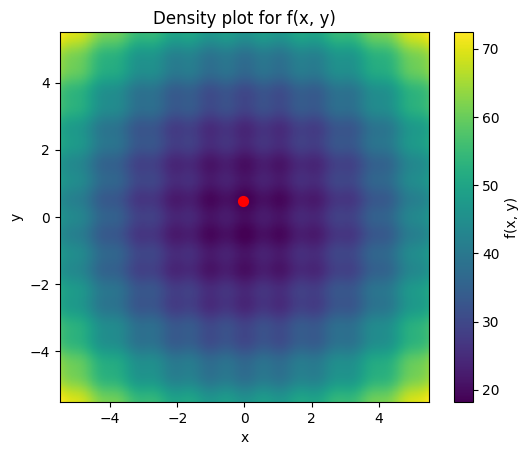

In [ ]:
# Density Plot

# Grid
x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y)

# Evaluate
Z = f(X, Y)

# Density Plot
plt.imshow(Z, extent=[-5.5, 5.5, -5.5, 5.5], origin='lower')
plt.colorbar(label='f(x, y)')
plt.scatter(result[0], result[1], color='red', marker='o', s=50, alpha=1.0)
plt.title('Density plot for f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

El Density plot muestra una solución muy buena al fondo de la función f(x,y) en un area mínima.

Y también se puede observar en un plot 3D y señalar la solución encontrada; ya sea un plot de contornos o densidad. Estos plots 3D más sofisticados demuestran la aptitud de la solución encontrada.


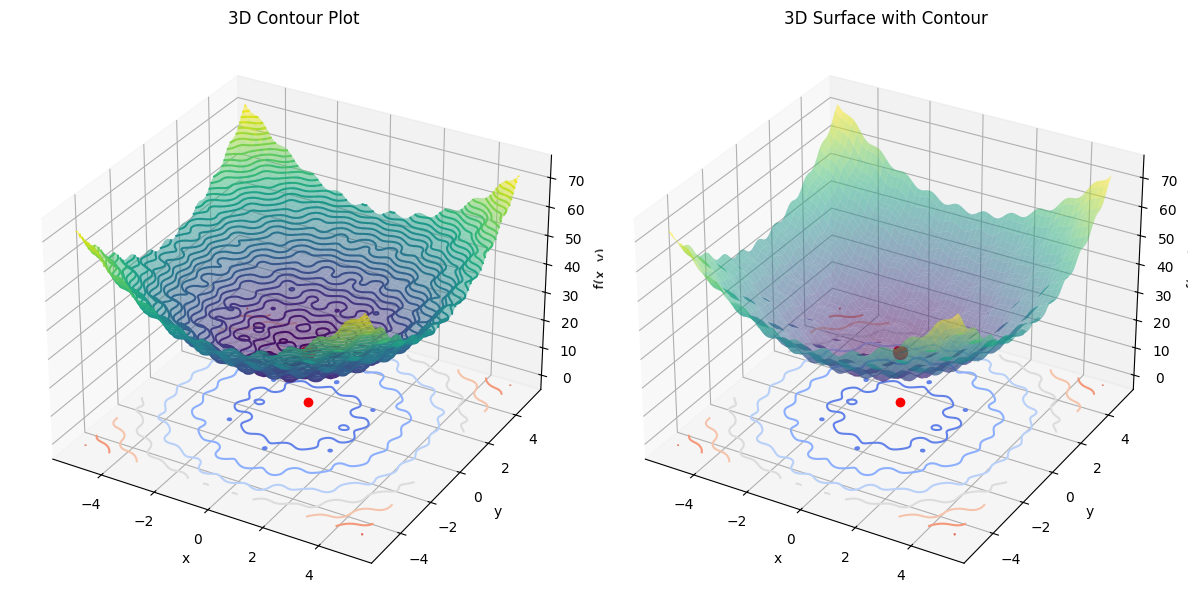

In [ ]:
# 3D Plots

# Grid
x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y)

# Evaluate
Z = f(X, Y)

# Plot size
fig = plt.figure(figsize=(12, 6))

# 3D Contour Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax1.plot(result[0], result[1], color='red', marker='o', alpha=1.0)
ax1.contour3D(X, Y, Z, 50, cmap='viridis', alpha=1.0)
ax1.contour(X, Y, Z, zdir='z', offset=-2, cmap='coolwarm')
ax1.scatter(result[0], result[1], f(result[0], result[1]), color='red', marker='o', s=100, alpha=1.0)
ax1.set_title('3D Contour Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# 3D Surface Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax2.plot(result[0], result[1], color='red', marker='o', alpha=1.0)
ax2.contour(X, Y, Z, zdir='z', offset=-2, cmap='coolwarm')
ax2.scatter(result[0], result[1], f(result[0], result[1]), color='red', marker='o', s=100, alpha=1.0)
ax2.set_title('3D Surface with Contour')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')

# Show everything
plt.tight_layout()

¿Cómo fue la evolución de la aptitud?
La aptitud fue diseñada para incrementar conforme la función se minimizaba. Tomando en cuenta la mejor solución por generación, esa tuvo una mejora constante en la aptitud; incluso se ve una convergencia rápida antes de que todas las generaciones se terminen. Mantener una población alta (250) de individuos y seleccionar elitistamente el 50% permite mantener variabilidad alta (el 50% de individuos de la siguiente generación son nuevos), y aprovechar el 50% de las mejores soluciones ya encontradas. Por eso se ve un salto grande en la función de aptitud entre las primeras cinco generaciones, gracias a la exploración del 50%, y posteriormente converge rápidamente, gracias a la explotación elitista del otro 50%.

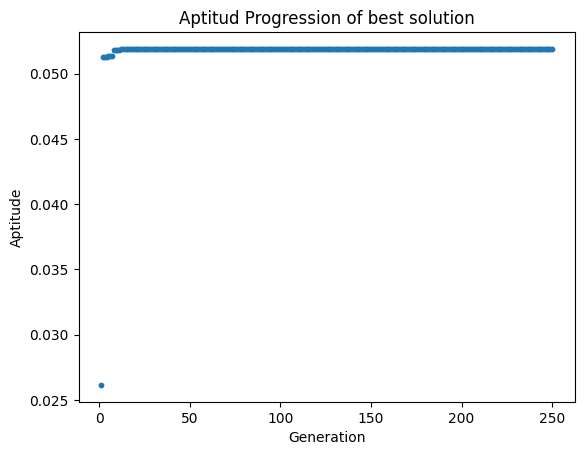

In [ ]:
# Aptitude progression
plt.scatter(x=list(range(1, len(aptitude)+1)), y=aptitude, s=10)
plt.title('Fitness Progression of best solution')
plt.xlabel('Fitness')
plt.ylabel('Aptitude')
plt.show()

¿Qué estrategias ayudaron a evitar óptimos locales?

Se usó reemplazo elitista, pero solo tomando la primera mejor mitad de las soluciones, asegurando así mucha varibilidad mediante el cruce de padres, donde la mitad de nuevas soluciones por generación eran combinaciones únicas de los padres. Por ello, se observa una mejora enorme entre la primer generación y algunas posteriores, ya que se favoreció la Exploration. Pero gracias al replazo elitista y a una buena función de aptitud, el método convergió muy rápido tras unas pocas iteraciones porque toma solo los mejores padres, favoreciendo la Explotaition una vez que se halló una solución muy buena. Es decir, usar un reemplazo elitista al 50% permite explorar muchas soluciones manteniendo una alta variabilidad, pero favorece las mejores soluciones una vez encontradas. De esta manera, se mantiene un buen equilibrio Exploration-Explotaition, se dan saltos grandes hacia la mejor solución, la convergencia es rápida, y se exploran muchas soluciones.

Desde luego que esto funciona gracias al gran número de individuos de la población (250), que permite explorar muchas soluciones nuevas y mantener muchas de las mejores ya encontradas (exploration), de tal modo que no se necesitaría de un número alto de generaciones para hallar una lo suficientemente buena y empezar a converger (la solución se estabiliza en ~generación 50). Pero mantener un buen número de generaciones asegura sacar el mejor provecho de las buenas soluciones (explotaition).